# Homework2

** Goal: **

Prediction of energy demand of buildings using a Neural Network.

** Data file: ** 

energyData.xlsxPreview the document (source: UC Irvine Machine Learning repository)

** Data generation: **

Energy analysis using 12 different building shapes has been performed in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. Various combinations of these features result in 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses, heating load.

** Attribute Information: **

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1). 

** Specifically: ** 

X1 Relative Compactness 

X2 Surface Area 

X3 Wall Area 

X4 Roof Area 

X5 Overall Height 

X6 Orientation 

X7 Glazing Area 

X8 Glazing Area Distribution 

y1 Heating Load 

** Problems: **

Write one Python Script using jupyter (call it SBAC_Fa18_HW2_YourName.ipynb) to achieve the following tasks

Q1 (0.5Pts) Import the data file into a pandas dataframe called 'eD'.

Q2 (0.5Pts) Separate the data in eD into the design matrix X1=[X1 X2 X3 X4], X2=[X5 X6 X7 X8] and the target data Y=[Y1].

Q3 (2Pts) Use scikitlearn's train_test_split to split your data into train and test set. Use this test size (0.2).

Q4 (5Pts) Use scikitlearn's MLPRegressor to create two different models that predict Y1 from the observations in X1 and X2. Use (hidden_layer_sizes=(10, 10, 10), max_iter=1000) setting for your model.

Q5 (1Pts) Use seaborn's tsplot to visualize your predictions from the two models and their actual test data, respectively (plot1: predictions from model 1 vs test and plot2: predictions from model 2 vs test). 

Q6 (1Pts) Use scikitlearn's mean_squared_error to calculate errors (MSE) of each model and determine which model (different feature setting, X1 or X2) performs better.

Bonus (3Pts) Choose one model and improve prediction accuracy by changing MLPRegressor parameters.

You will find hints on each line (denoted by #). Use these hints to finish your python code on each line.

In [2]:
# Import pandas library
import pandas as pd


** 1. Read data **

In [3]:
# Use pandas library read csv data 
eD = pd.read_csv('energyData.csv')

In [5]:
# Double check the length of eD using len()
len(eD)

768


In [53]:
# Double check the data (eD) using .head() 
eD.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


** 2. Separate the data **

In [61]:
# Assign data from X1, X2, X3, and X4 features to x_1 dataframe using iloc
x_1 = eD.iloc[:, 0:4]

# Assign data from X5, X6, X7, and X8 features to x_2 dataframe using iloc
x_2 = eD.iloc[:, 4:8]

# Assign data from Y1 to y variable
y = eD['Y1']


In [62]:
# Double check the data (x_1) using .head() 
x_1.head()

,X1,X2,X3,X4
0,0.98,514.5,294.0,110.25
1,0.98,514.5,294.0,110.25
2,0.98,514.5,294.0,110.25
3,0.98,514.5,294.0,110.25
4,0.90,563.5,318.5,122.50


In [63]:
# Double check the data (x_2) using .head() 
x_2.head()

,X5,X6,X7,X8
0,7.0,2,0.0,0
1,7.0,3,0.0,0
2,7.0,4,0.0,0
3,7.0,5,0.0,0
4,7.0,2,0.0,0


In [64]:
# Double check the data (y) using .head() 
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

** 3. Split the data & 4. Learn the model**

For x_1,

In [65]:
# Import train_test_split function from sklearn.model_selection
import numpy as np
from sklearn.model_selection import train_test_split

In [66]:
# Split your dataset to train and test sets using train_test_split function.
# Use test_size = 0.2
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_1, y, test_size=0.2)

In [67]:
# Import MLPRegressor from sklearn.neural_network
from sklearn.neural_network import MLPRegressor

In [68]:
# Initiate model_1 using MLPRegressor 
# Use hidden_layer_sizes=(10, 10, 10), max_iter=1000
model_1 = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Fit your model_1 with train sets
model_1.fit(X_train_1, y_train_1)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [69]:
# Assign predictions_1 as the prediction result from model_1 with test dataset using predict
predictions_1 = model_1.predict(X_test_1)

In [71]:
# Check your prediction result 
model_1.score(X_test_1, y_test_1)

0.8832143858093124

For x_2,

In [72]:
# Split your dataset to train and test sets using train_test_split function.
# Use test_size = 0.2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y, test_size=0.2)

In [76]:
# Initiate model_2 using MLPRegressor 
# Use hidden_layer_sizes=(10, 10, 10), max_iter=1000
model_2 = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Fit your model_2 with train sets
model_2.fit(X_train_2, y_train_2)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [77]:
# Assign predictions_2 as the prediction result from model_2 with test dataset using predict
predictions_2 = model_2.predict(X_test_2)

In [78]:
# Check your prediction result 
model_2.score(X_test_2, y_test_2)

0.8699617887421874

** Q5. Visualize the results & Q6. Evaluation**

In [79]:
# Import matplotlib library
import matplotlib.pyplot as plt


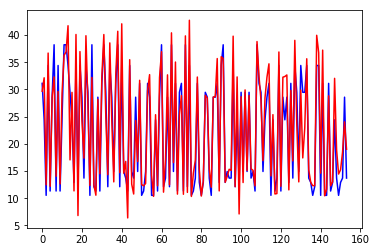

In [80]:
# Plotting prediction_1 (blue) and y_test_1 (red), using plot from matplotlib
plt.plot(model_1.predict(X_test_1), color='b')
plt.plot(y_test_1.values, color='r')

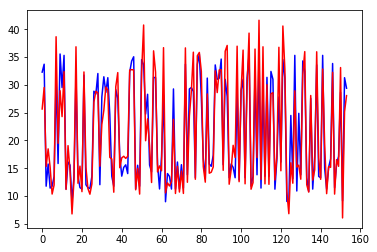

In [81]:
# Plotting prediction_1 (blue) and y_test_1 (red), using plot from matplotlib
# Typo? 2?
plt.plot(model_2.predict(X_test_2), color='b')
plt.plot(y_test_2.values, color='r')

In [84]:
# Import mean_squared_error from sklearn.metric
from sklearn.metrics import mean_squared_error

In [85]:
# Calculate mean squared error (MSE) for model_1
mean_squared_error(y_test_1, model_1.predict(X_test_1))

12.703255915327542

In [86]:
# Calculate mean squared error (MSE) for model_2
mean_squared_error(y_test_2, model_2.predict(X_test_2))

12.24554700405807

In [ ]:
# Which model performs better? Why? (1-2 sentences)
# [YOUR ANSWER]

** Q7. Bonus question**